# Anomaly Detection

In [2]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_table("anomaly-s050.dat", sep="\s+",header=None)
data = df.to_numpy()
data = data.reshape([10000,1])
data

array([[ 0.287529],
       [ 0.199873],
       [ 0.184906],
       ...,
       [ 0.200825],
       [-0.328616],
       [ 0.079371]])

## Histogram

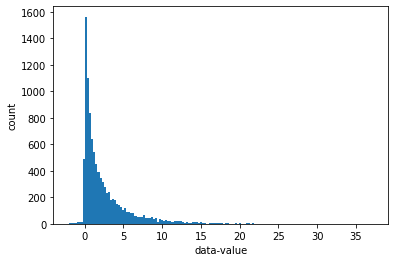

In [4]:
plt.hist(data, bins='auto')
plt.xlabel('data-value')
plt.ylabel('count')
plt.show()

## Boxplot

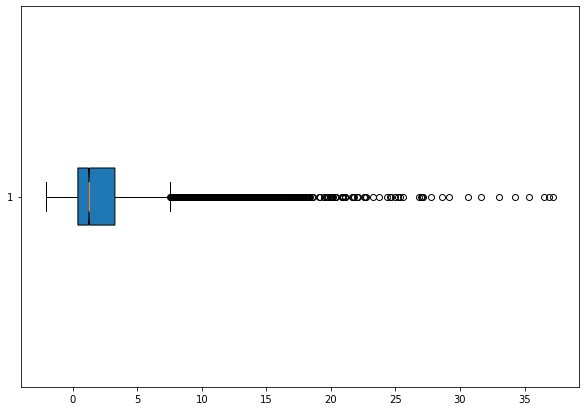

In [14]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

In [39]:
upper_limit = np.quantile(data, 0.90)
lower_limit = np.quantile(data,0.10)
print(lower_limit, upper_limit)

0.12008730000000004 6.4010095000000025


## Statistical Method

In [36]:
mean = data.mean()
std = data.std()
sigma = std*std
lower_limit = mean-2*std
upper_limit = mean+2*std
print(mean, std, sigma)
print(lower_limit, upper_limit)
allowed_data = data[np.where(data>lower_limit)]
allowed_data = allowed_data[np.where(allowed_data<upper_limit)]
print(len(data) - len(allowed_data))

2.5060381563000003 3.404343952149514 11.589557744536972
-4.302649747999027 9.314726060599028
477


## Tukey's Method

In [20]:
def tukey(x, k = 1.5):
    x = np.array(x).copy().astype(float)
    first_quartile = np.quantile(x, .25)
    third_quartile = np.quantile(x, .75)
    
    # Define IQR
    iqr = third_quartile - first_quartile
    
    ### Define the allowed limits for 'Normal Data'
    lower_allowed_limit = first_quartile - (k * iqr)
    upper_allowed_limit = third_quartile + (k * iqr)

    print(lower_allowed_limit, upper_allowed_limit)
    
    #set values below the lower limit/above the upper limit as nan
    x[(x<lower_allowed_limit) | (x>upper_allowed_limit)] = np.nan
    return x

In [27]:
x = tukey(data, k=2.5)
c = np.count_nonzero(np.isnan(x))
c

-6.76108375 10.44064625


372

## Z-Score

In [5]:
result = []

mean = data.mean()
std = data.std()
threshold = 2.0
count_anomaly = 0

for x in data:
    z_score = (x-mean)/std
    if z_score>threshold:
        count_anomaly = count_anomaly+1
        result.append(1)
    else:
        result.append(0)
result = np.asarray(result)
outliers = result.reshape([100,100])
print(count_anomaly)

477
